In [1]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('TG_STAID004563.txt', sep=",",skiprows=18)
df.head()

,SOUID,DATE,TG,Q_TG
0,127488,18760101,22,0
1,127488,18760102,25,0
2,127488,18760103,3,0
3,127488,18760104,-58,0
4,127488,18760105,-98,0


In [3]:
df.columns

Index([' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [4]:
df['    DATE'].max()

20200630

In [5]:
df['   TG'].isnull

<bound method Series.isnull of 0         22
1         25
2          3
3        -58
4        -98
        ... 
52772    229
52773    248
52774    218
52775    186
52776    192
Name:    TG, Length: 52777, dtype: int64>

In [6]:
df.describe()

,SOUID,DATE,TG,Q_TG
count,52777.000000,5.277700e+04,52777.000000,52777.000000
mean,124188.602156,1.947817e+07,56.579779,0.033253
std,4334.752786,4.171368e+05,617.379134,0.546057
min,111448.000000,1.876010e+07,-9999.000000,0.000000
25%,121152.000000,1.912022e+07,33.000000,0.000000
50%,127488.000000,1.948040e+07,93.000000,0.000000
75%,127488.000000,1.984052e+07,157.000000,0.000000
max,127848.000000,2.020063e+07,308.000000,9.000000


In [7]:

df.rename({" SOUID": "source_id", "    DATE": "date", "   TG":"temperature", " Q_TG":"quality_code"}, axis=1, inplace =True)

In [8]:
df[df['temperature']== df['temperature'].min()].count()

source_id       195
date            195
temperature     195
quality_code    195
dtype: int64

In [9]:
type(df['date']), type(df['source_id'])

(pandas.core.series.Series, pandas.core.series.Series)

In [10]:
df[df['temperature']== -9999]

,source_id,date,temperature,quality_code
25316,127488,19450425,-9999,9
25317,127488,19450426,-9999,9
25318,127488,19450427,-9999,9
25319,127488,19450428,-9999,9
25320,127488,19450429,-9999,9
...,...,...,...,...
25506,127488,19451101,-9999,9
25507,127488,19451102,-9999,9
25508,127488,19451103,-9999,9
25509,127488,19451104,-9999,9


In [11]:
boolw =df['date'][0].astype(str) <'19460101'
boolw

True

In [12]:
df.drop(df.loc[df['date'].astype(str) < '19460101'].index, inplace=True)

In [13]:
df

,source_id,date,temperature,quality_code
25567,127488,19460101,-34,0
25568,127488,19460102,-30,0
25569,127488,19460103,-28,0
25570,127488,19460104,-27,0
25571,127488,19460105,14,0
...,...,...,...,...
52772,121152,20200626,229,0
52773,121152,20200627,248,0
52774,121152,20200628,218,0
52775,121152,20200629,186,0


In [14]:
df['year']= pd.to_datetime(df['date'].astype(str)).dt.year
df['month']= pd.to_datetime(df['date'].astype(str)).dt.month
df['day']= pd.to_datetime(df['date'].astype(str)).dt.day
df

,source_id,date,temperature,quality_code,year,month,day
25567,127488,19460101,-34,0,1946,1,1
25568,127488,19460102,-30,0,1946,1,2
25569,127488,19460103,-28,0,1946,1,3
25570,127488,19460104,-27,0,1946,1,4
25571,127488,19460105,14,0,1946,1,5
...,...,...,...,...,...,...,...
52772,121152,20200626,229,0,2020,6,26
52773,121152,20200627,248,0,2020,6,27
52774,121152,20200628,218,0,2020,6,28
52775,121152,20200629,186,0,2020,6,29


In [15]:
df.set_index('date', inplace=True)

In [16]:
df.index =  pd.to_datetime(df.index, format='%Y%m%d')
df.sort_index()

,source_id,temperature,quality_code,year,month,day
date,,,,,,
1946-01-01,127488,-34,0,1946,1,1
1946-01-02,127488,-30,0,1946,1,2
1946-01-03,127488,-28,0,1946,1,3
1946-01-04,127488,-27,0,1946,1,4
1946-01-05,127488,14,0,1946,1,5
...,...,...,...,...,...,...
2020-06-26,121152,229,0,2020,6,26
2020-06-27,121152,248,0,2020,6,27
2020-06-28,121152,218,0,2020,6,28


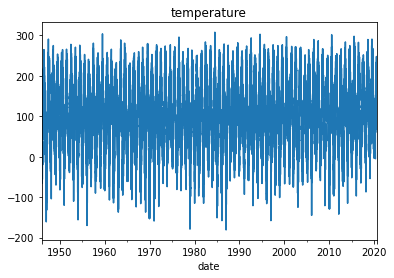

In [17]:
# Plot the data
df['temperature'].plot(title='temperature')

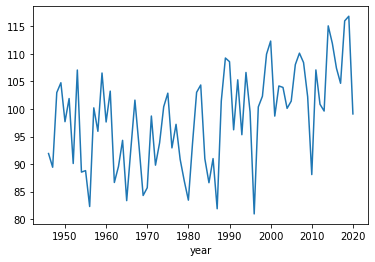

In [19]:
df.groupby(['year'])['temperature'].mean().plot()

In [20]:
#decompose the time series

In [21]:
y_train = df['1950':'2013'].copy()
y_test = df['2013':'2020'].copy()

In [22]:
y_train.shape , y_test.shape

((23376, 6), (2738, 6))

In [ ]:
y_train['monthly_means'] = y_train.groupby('month')['pct_change'].transform('mean')
y_train.head()

In [ ]:
y_train['deseasonalized'] = y_train['pct_change'] - y_train['monthly_means']
y_train.head()

In [ ]:
y_train['deseasonalized'].plot()